In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt


2024-08-12 05:36:53.474229: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-12 05:36:53.560720: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 05:36:54.032050: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 05:36:54.034376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 05:36:55.516980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
num_skipped = 0
for folder_name in ("barrel_jellyfish", "blue_jellyfish", "compass_jellyfish", "lions_mane_jellyfish", "Moon_jellyfish"):
    folder_path = os.path.join("Jelly_Fish_Images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 1112 images.


In [4]:
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "Jelly_Fish_Images",
    validation_split=0.2,
    label_mode="categorical",
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 746 files belonging to 5 classes.
Using 597 files for training.
Using 149 files for validation.


TypeError: only size-1 arrays can be converted to Python scalars

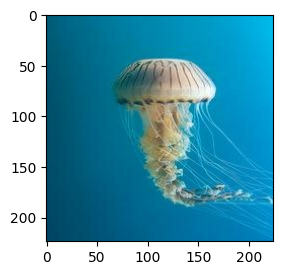

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [10]:
def loading():
    num_skipped = 0
    for folder_name in ("barrel_jellyfish", "blue_jellyfish", "compass_jellyfish", "lions_mane_jellyfish", "Moon_jellyfish"):
        folder_path = os.path.join("Jelly_Fish_Images", folder_name)
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)
            try:
                fobj = open(fpath, "rb")
                is_jfif = b"JFIF" in fobj.peek(10)
            finally:
                fobj.close()

            if not is_jfif:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)

    image_size = (224, 224)

    batch_size = 10

    train_ds, val_ds = keras.utils.image_dataset_from_directory(
        "Jelly_Fish_Images",
        validation_split=0.2,
        label_mode="categorical",
        subset="both",
        seed=1337,
        image_size=image_size,
        batch_size=batch_size,
    )
    